In [1]:
print(1+2)

3


In [128]:
## importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("data/stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [85]:
df.shape

(1000, 8)

## Dataset information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [86]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [89]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [90]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## EDA

In [91]:
print("______Categories in 'gender' variable:______")
print(df['gender'].unique())

print("______Categories in 'race_ethnicity' variable:______")
print(df['race_ethnicity'].unique())

print("______Categories in'parental level of education' variable:______")
print(df['parental_level_of_education'].unique())

print("______Categories in 'lunch' variable:______")
print(df['lunch'].unique())

print("______Categories in 'test preparation course' variable:______")
print(df['test_preparation_course'].unique())

______Categories in 'gender' variable:______
['female' 'male']
______Categories in 'race_ethnicity' variable:______
['group B' 'group C' 'group A' 'group D' 'group E']
______Categories in'parental level of education' variable:______
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
______Categories in 'lunch' variable:______
['standard' 'free/reduced']
______Categories in 'test preparation course' variable:______
['none' 'completed']


In [92]:
print("______Categories in 'gender' variable:______")
print(df['gender'].value_counts())

print("______Categories in 'race_ethnicity' variable:______")
print(df['race_ethnicity'].value_counts())

print("______Categories in'parental level of education' variable:______")
print(df['parental_level_of_education'].value_counts())

print("______Categories in 'lunch' variable:______")
print(df['lunch'].value_counts())

print("______Categories in 'test preparation course' variable:______")
print(df['test_preparation_course'].value_counts())

______Categories in 'gender' variable:______
gender
female    518
male      482
Name: count, dtype: int64
______Categories in 'race_ethnicity' variable:______
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
______Categories in'parental level of education' variable:______
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
______Categories in 'lunch' variable:______
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
______Categories in 'test preparation course' variable:______
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [93]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [94]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [95]:
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [96]:
len(num_features)

3

In [97]:
len(cat_features)

5

### Adding columns for "Total score" and "Average score"

In [98]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [99]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [129]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


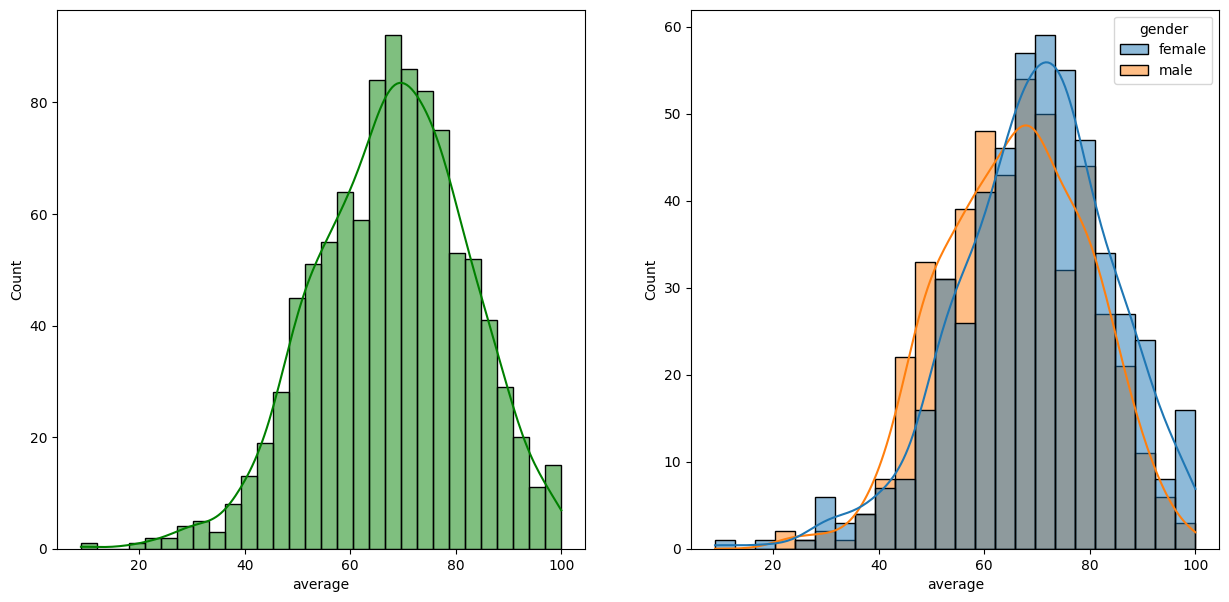

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

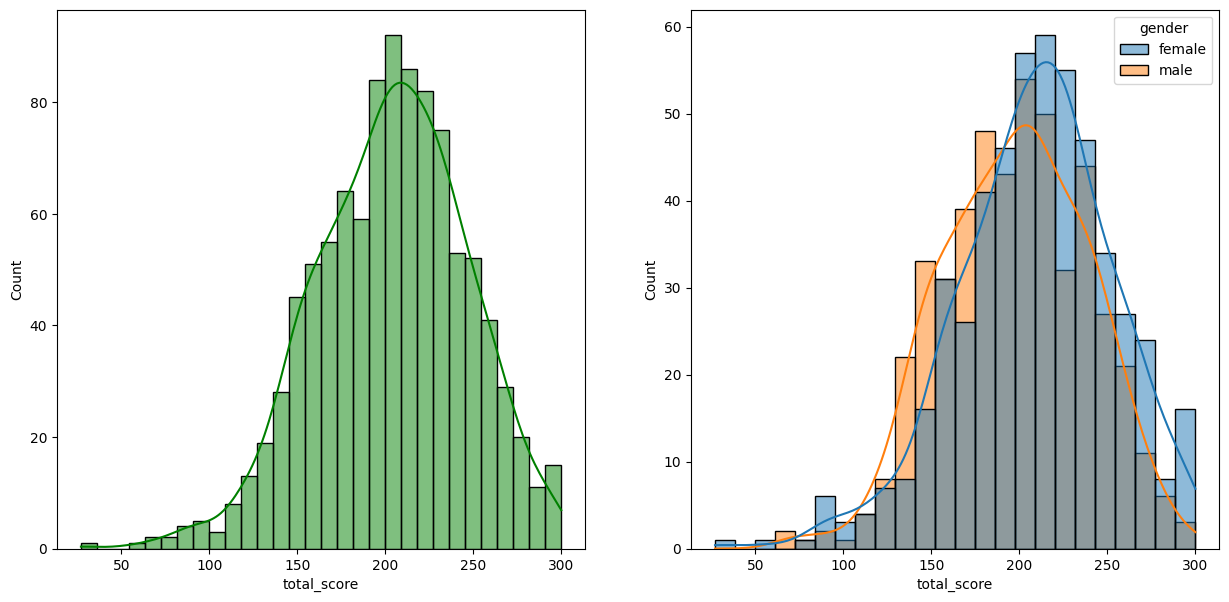

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

In [132]:
df[df.gender=='male']

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667
...,...,...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54,162,54.000000
987,male,group E,some high school,standard,completed,81,75,76,232,77.333333
990,male,group E,high school,free/reduced,completed,86,81,75,242,80.666667
994,male,group A,high school,standard,none,63,63,62,188,62.666667


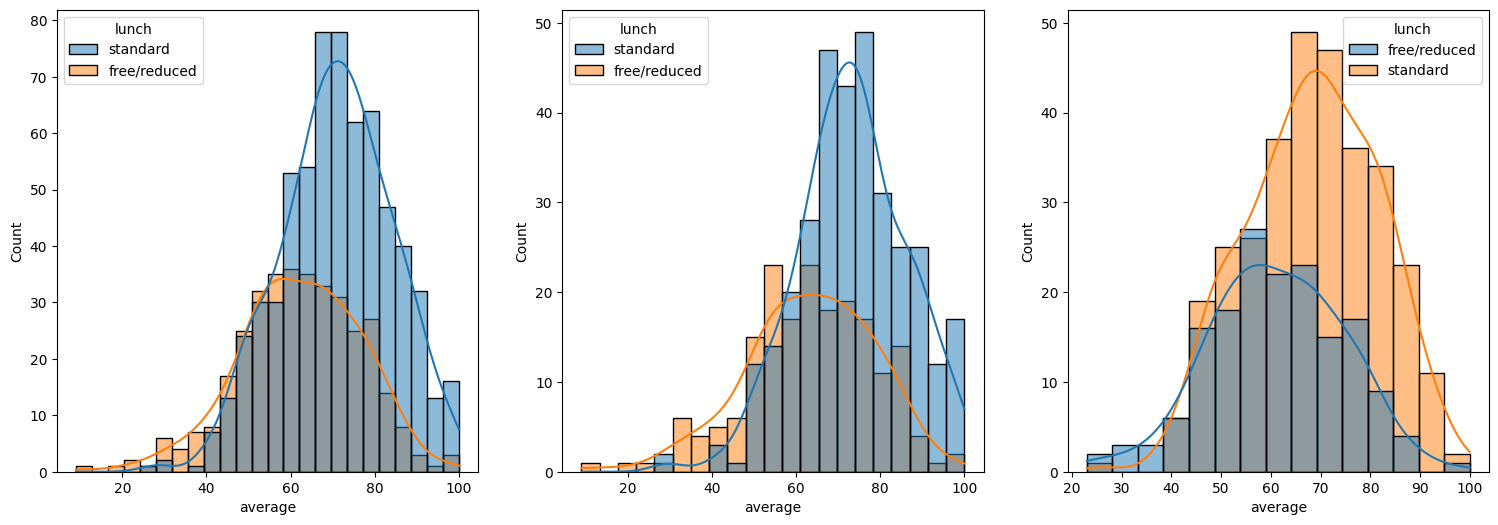

In [133]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [134]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

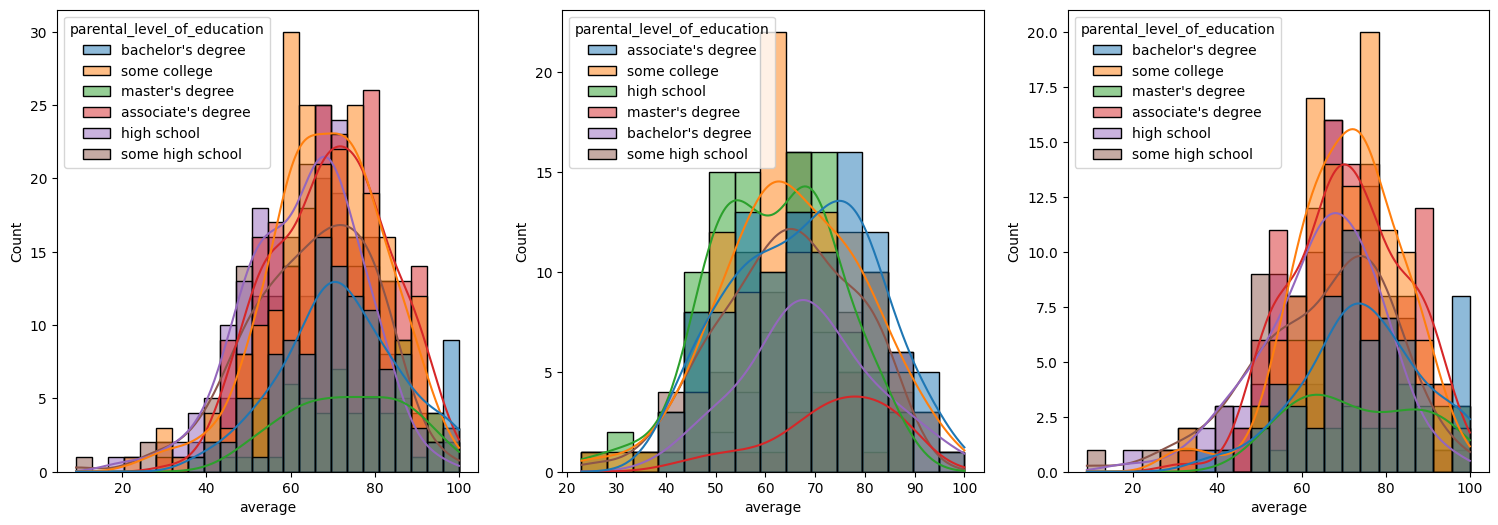

In [135]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

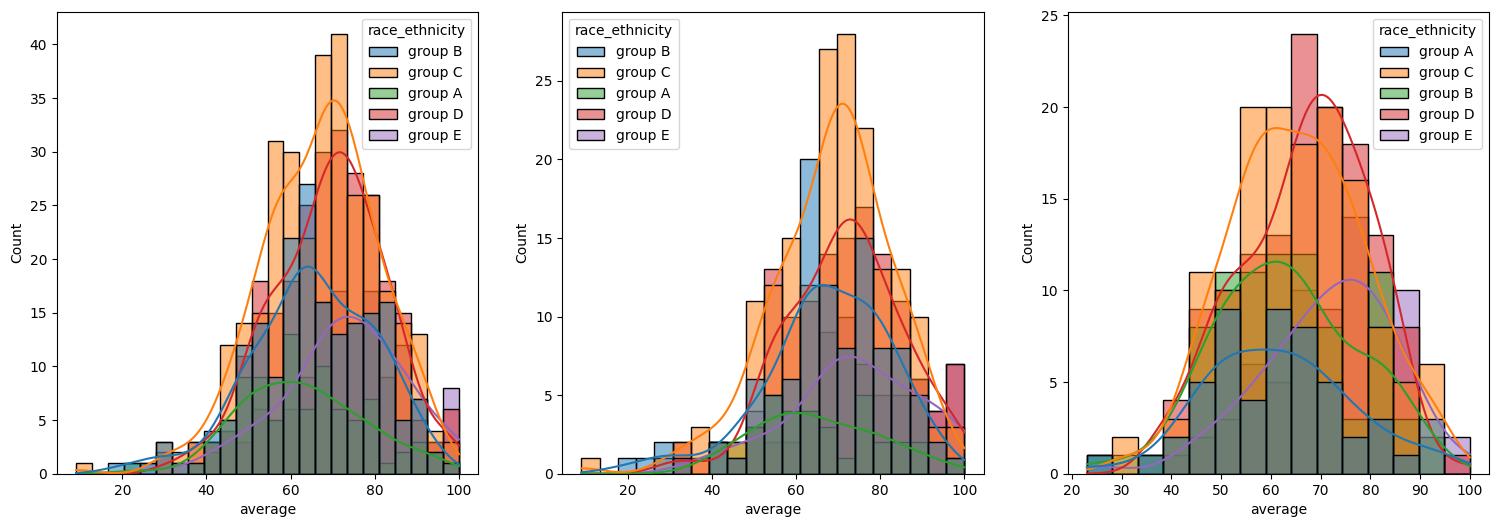

In [136]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

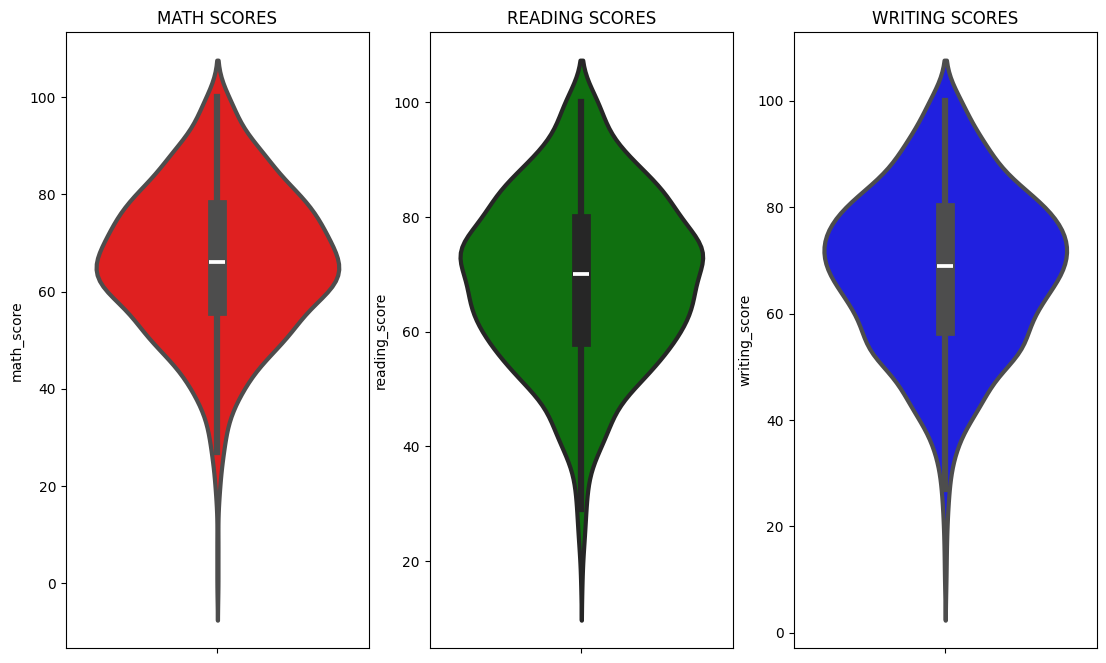

In [137]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [138]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

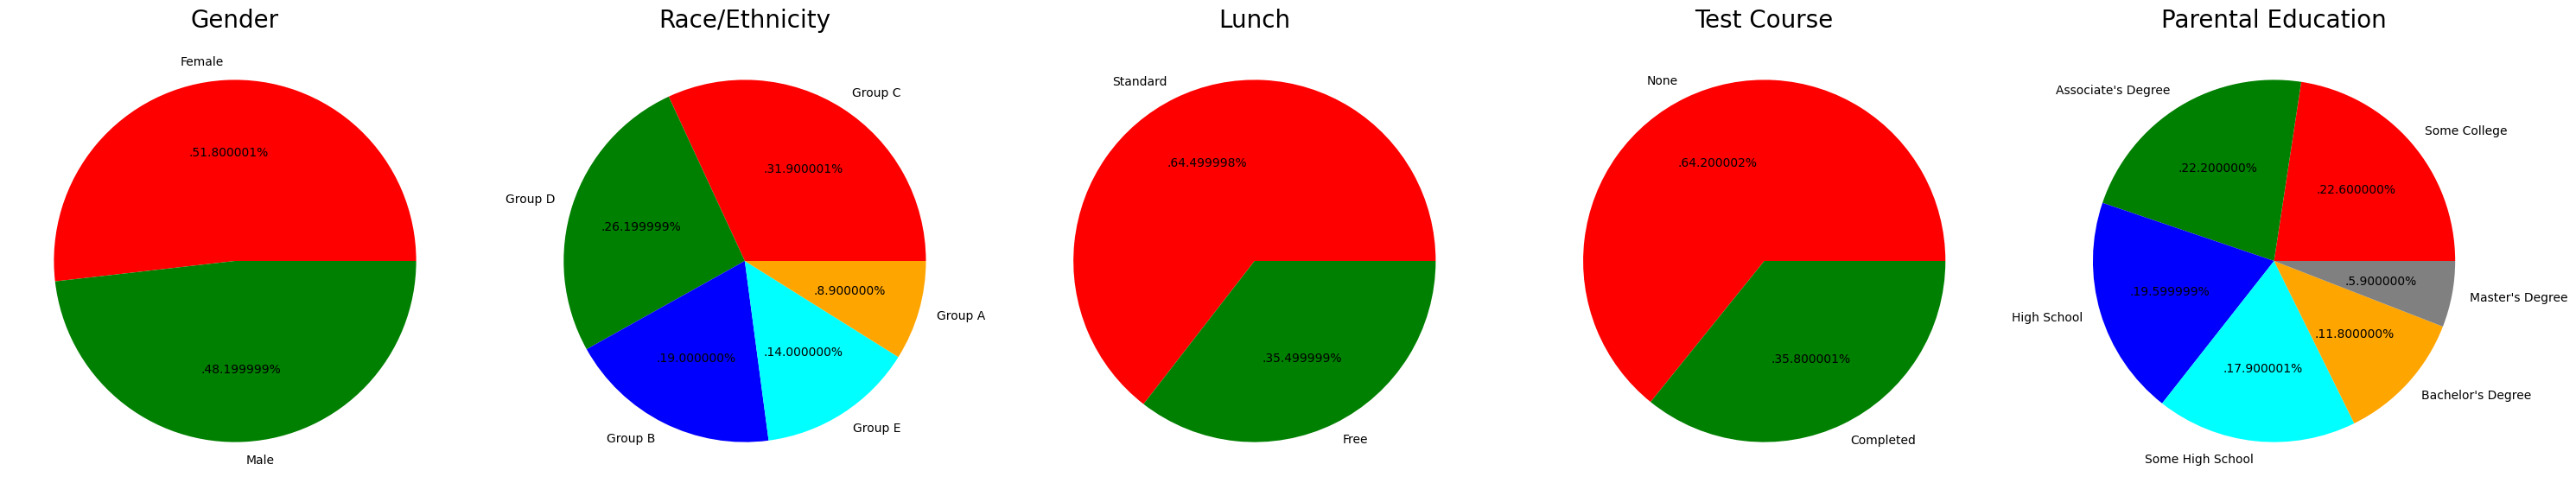

In [139]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

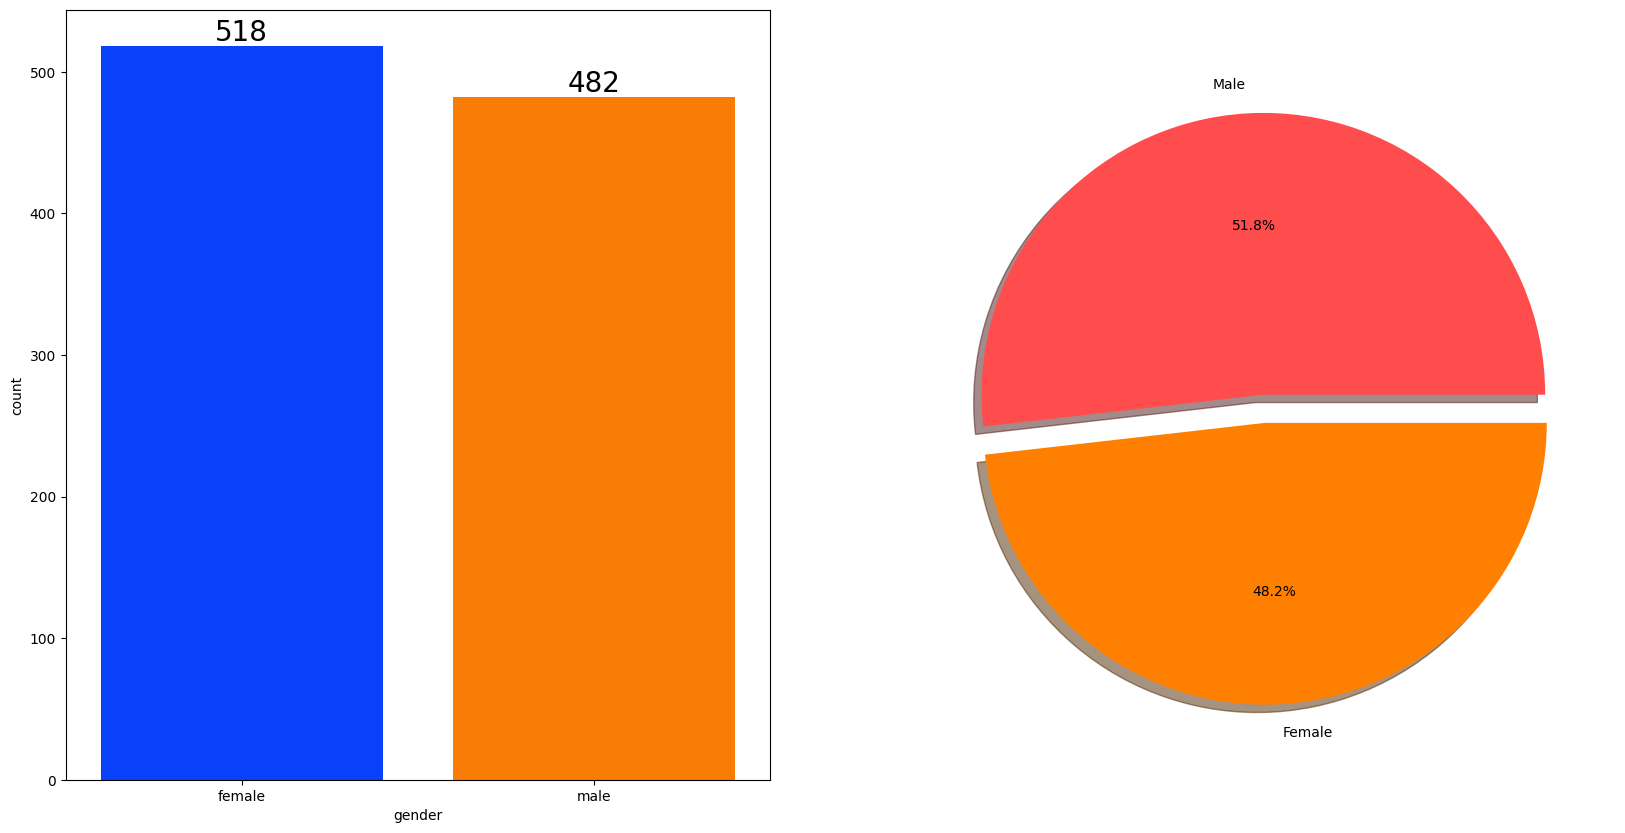

In [140]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Gender

In [141]:
# gender_group = df.groupby(['gender']).mean()
gender_group = df.groupby(['gender']).sum()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


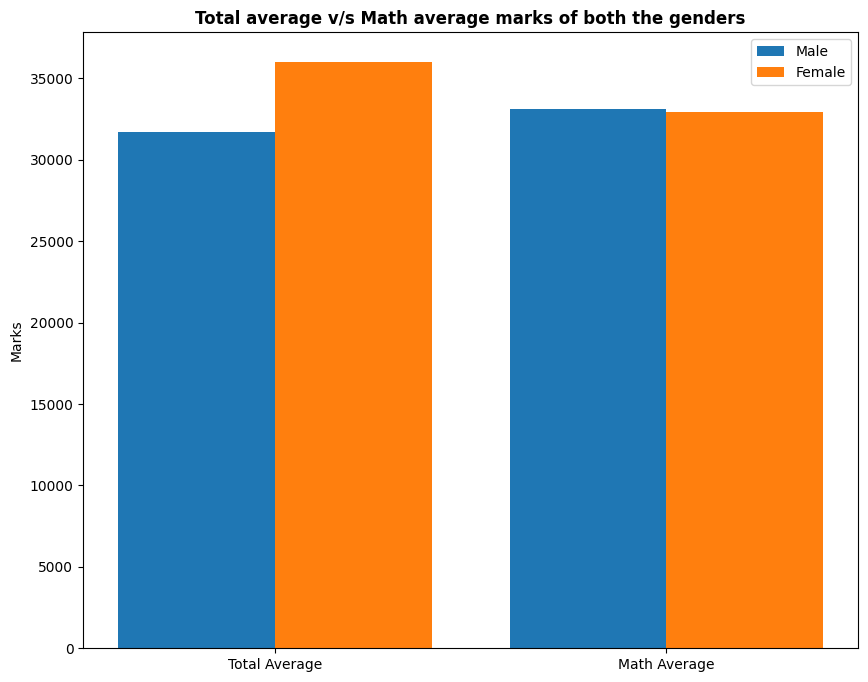

In [142]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Race and ethnicity

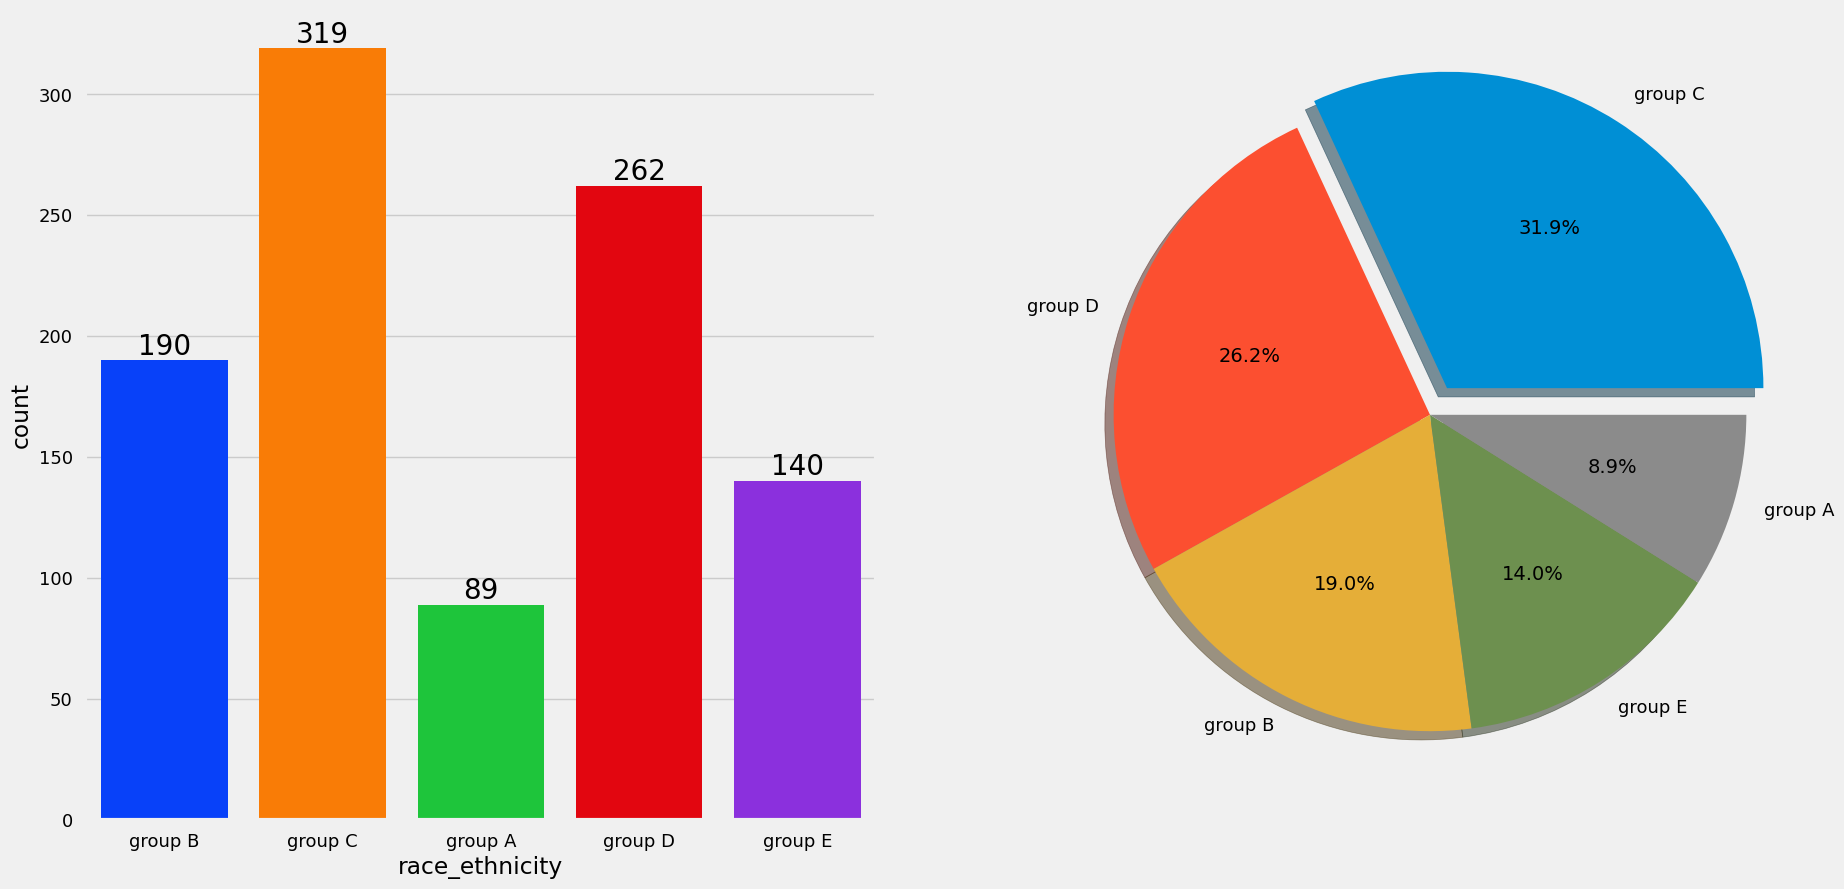

In [154]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],
              data=df,
              palette = 'bright',
              ax=ax[0],
              saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True)
plt.show() 

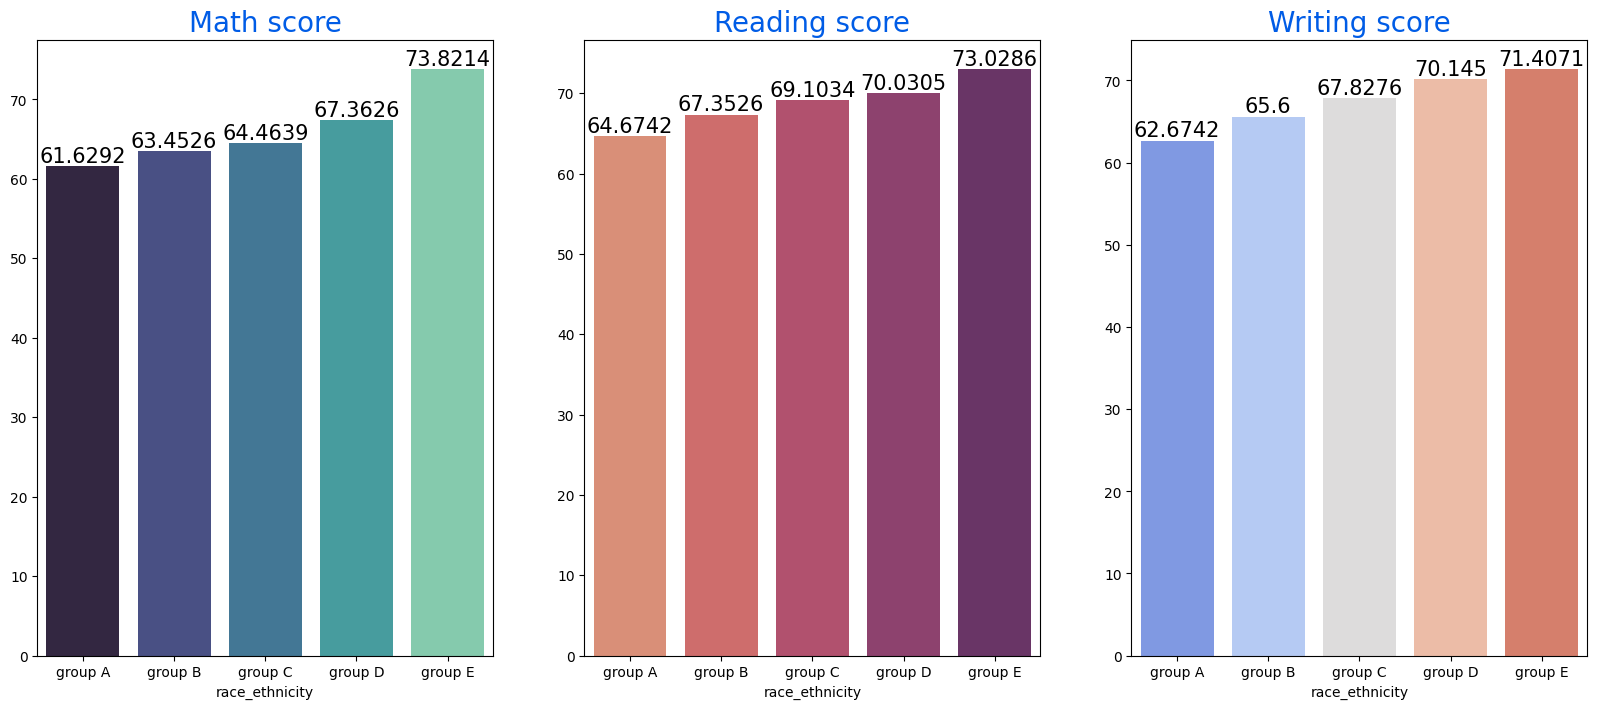

In [144]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',
                color='#005ce6',
                size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,
                    color='black',
                    size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',
                color='#005ce6',
                size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,
                    color='black',
                    size=15)

## Parental level of education column

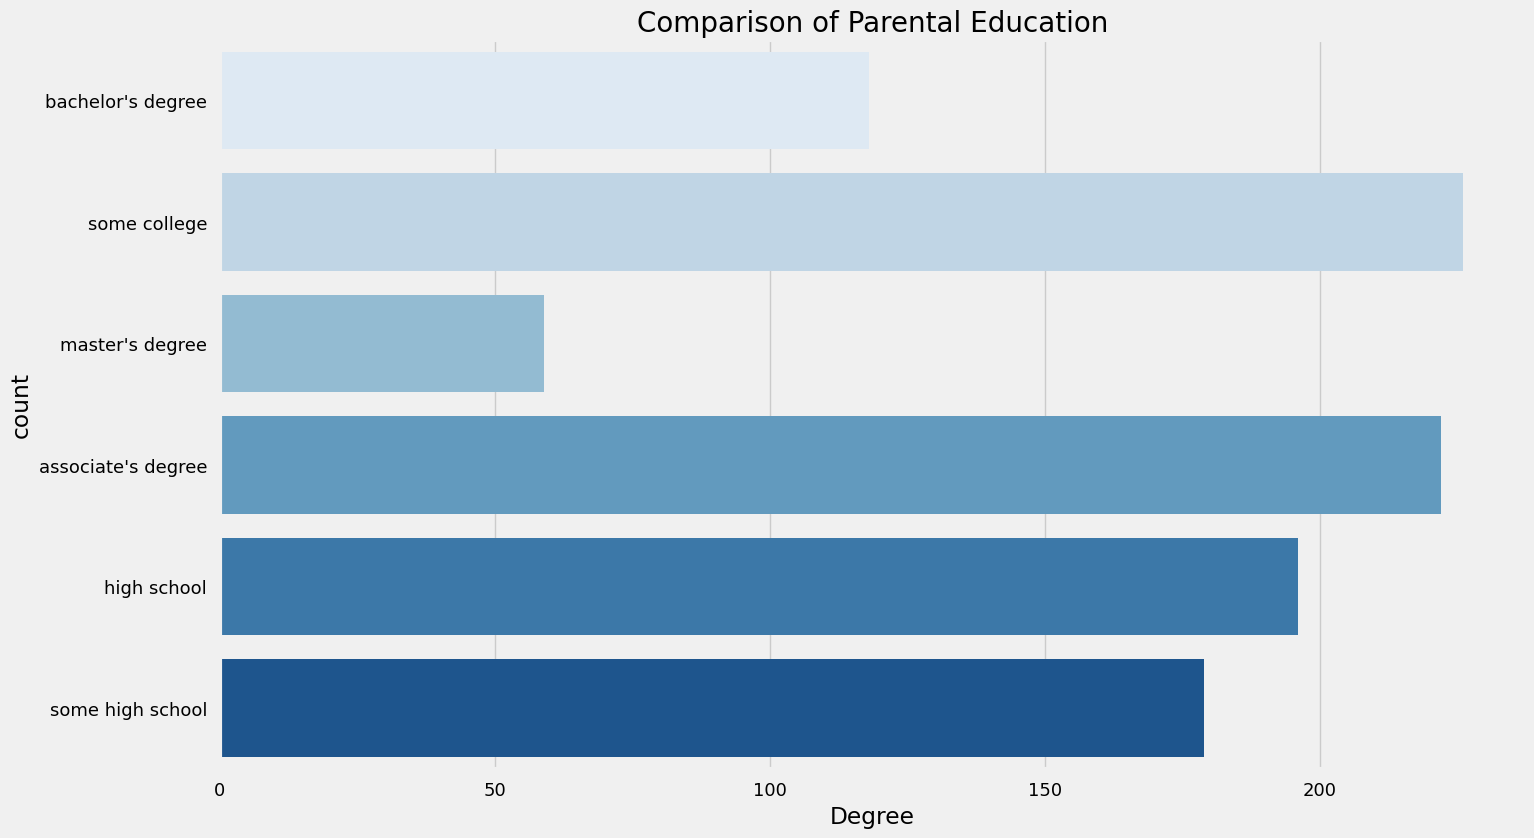

In [153]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'], palette = 'Blues')

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

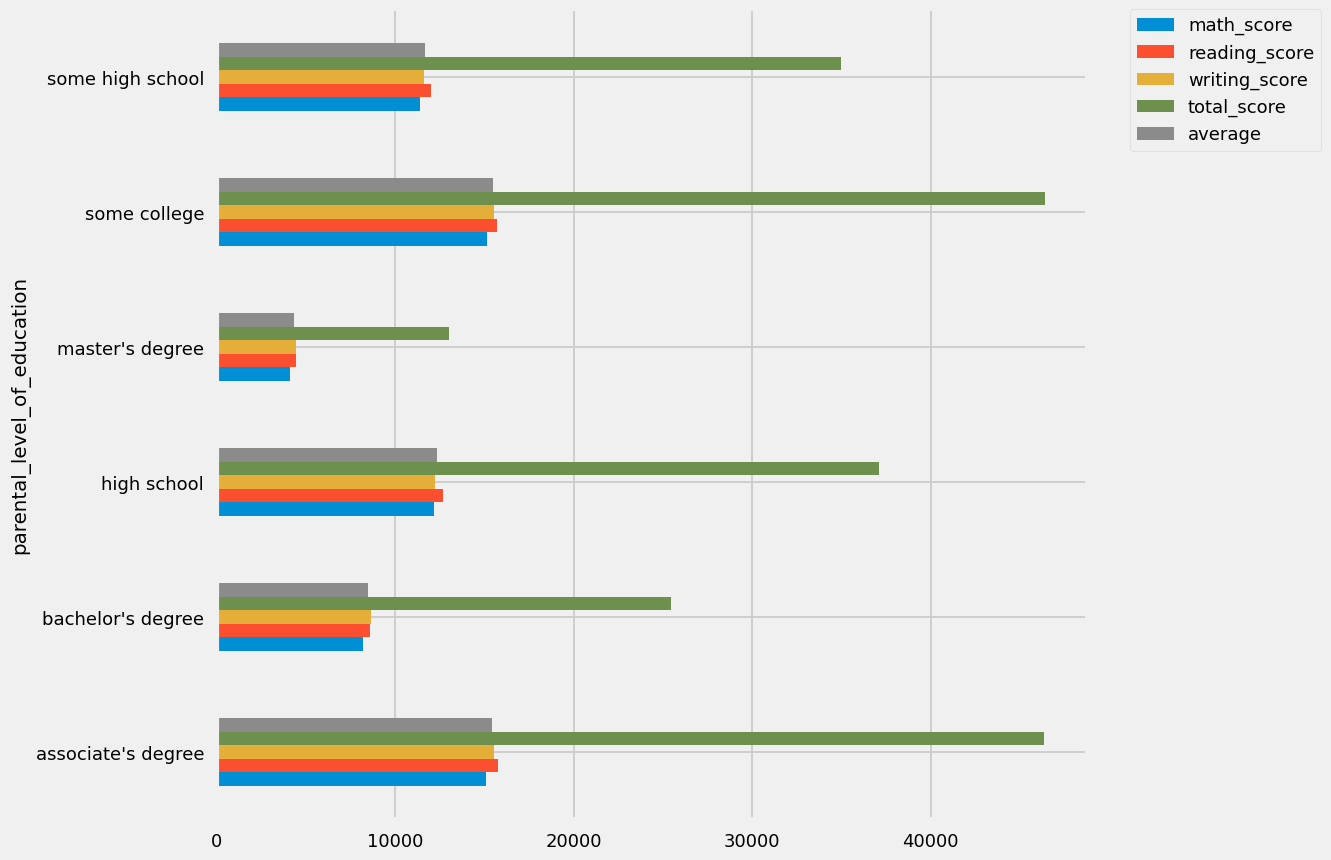

In [152]:
df.groupby('parental_level_of_education').agg('sum').plot(kind='barh',figsize=(10,10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Lunch column

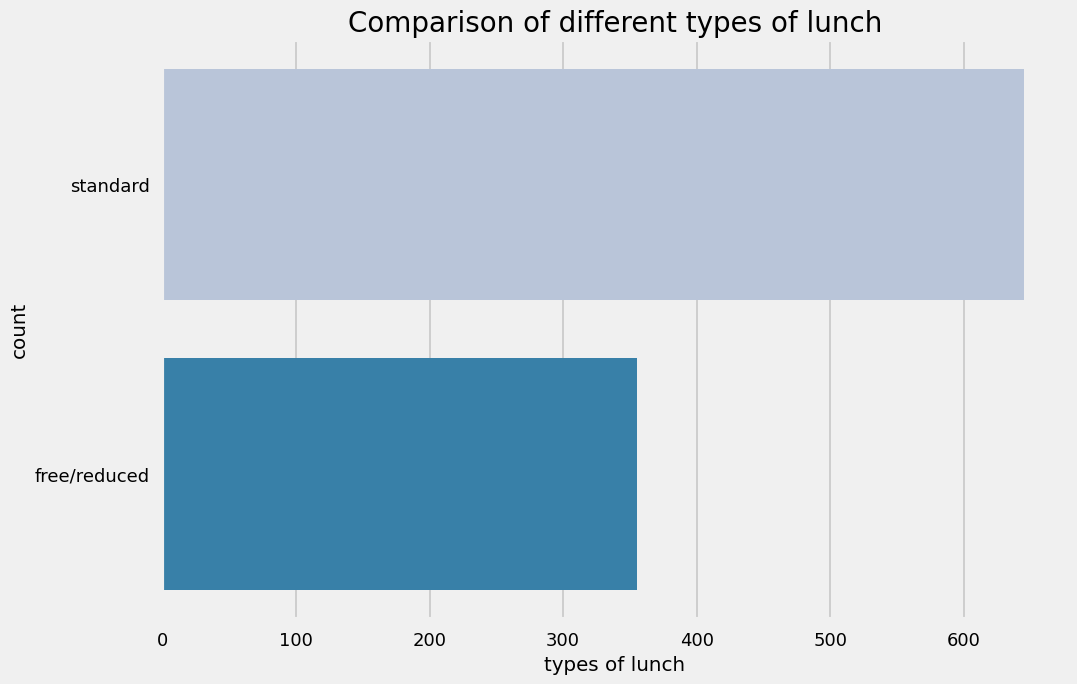

In [151]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(df['lunch'], palette = 'PuBu')

plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

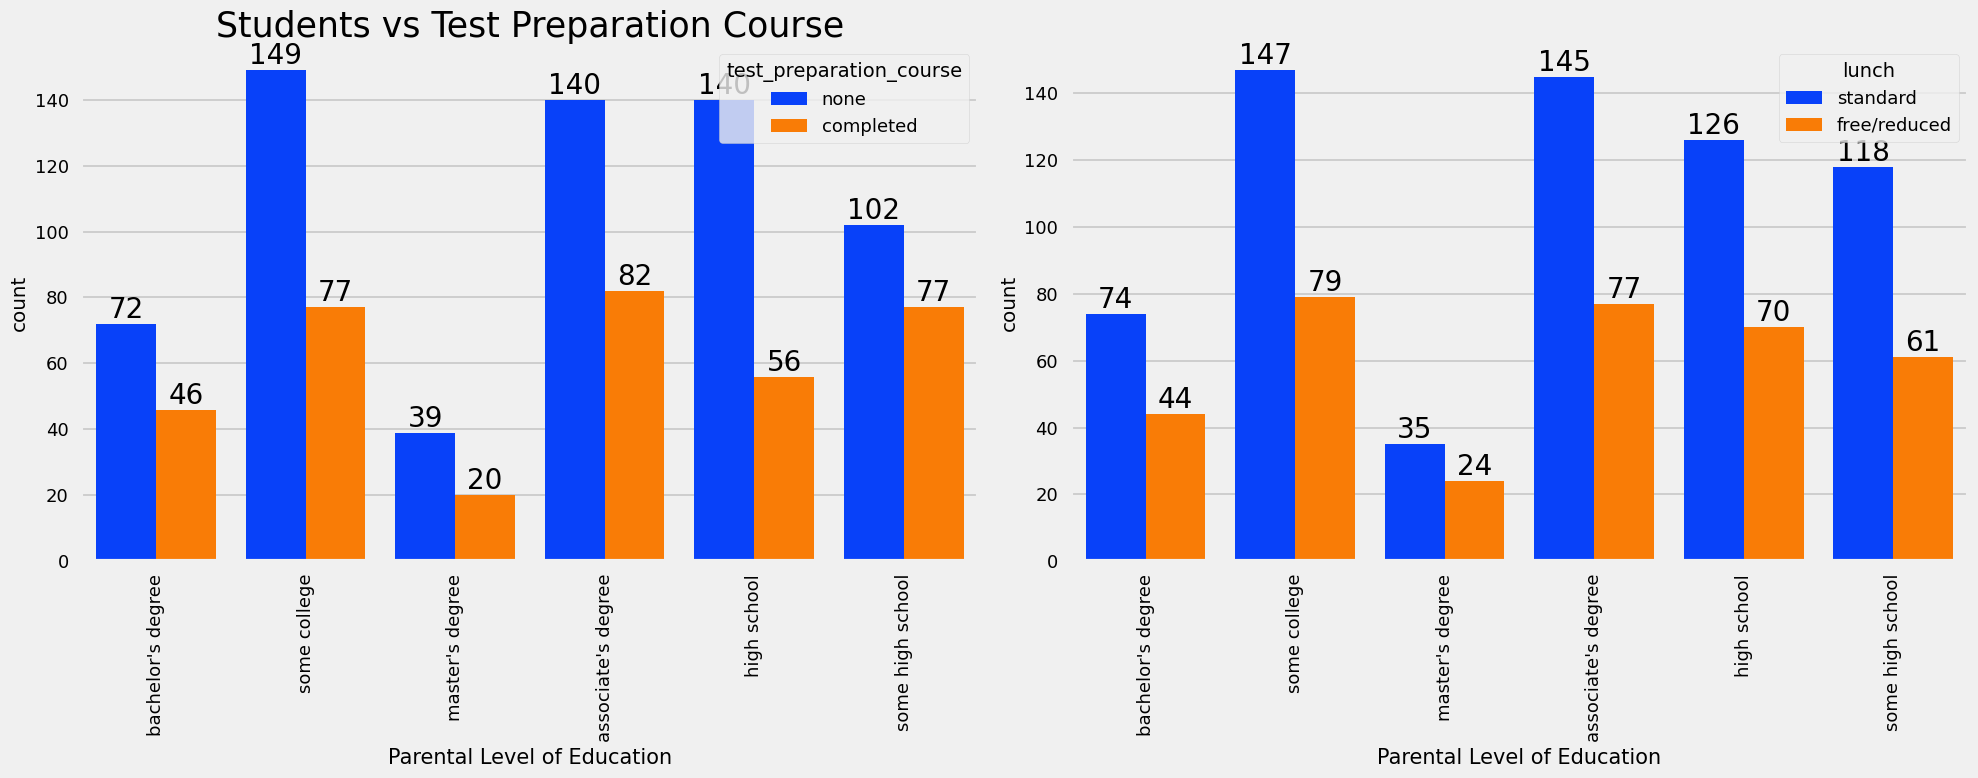

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Test Preparation Course
sns.countplot(
    x=df['parental_level_of_education'], 
    data=df, 
    palette='bright', 
    hue='test_preparation_course', 
    saturation=0.95, 
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', size=15)  # Add x-label
ax[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot 2: Lunch
sns.countplot(
    x=df['parental_level_of_education'], 
    data=df, 
    palette='bright', 
    hue='lunch', 
    saturation=0.95, 
    ax=ax[1]
)
ax[1].set_xlabel('Parental Level of Education', size=15)  # Add x-label
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Add bar labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()


## Test preparation

<Axes: xlabel='lunch', ylabel='writing_score'>

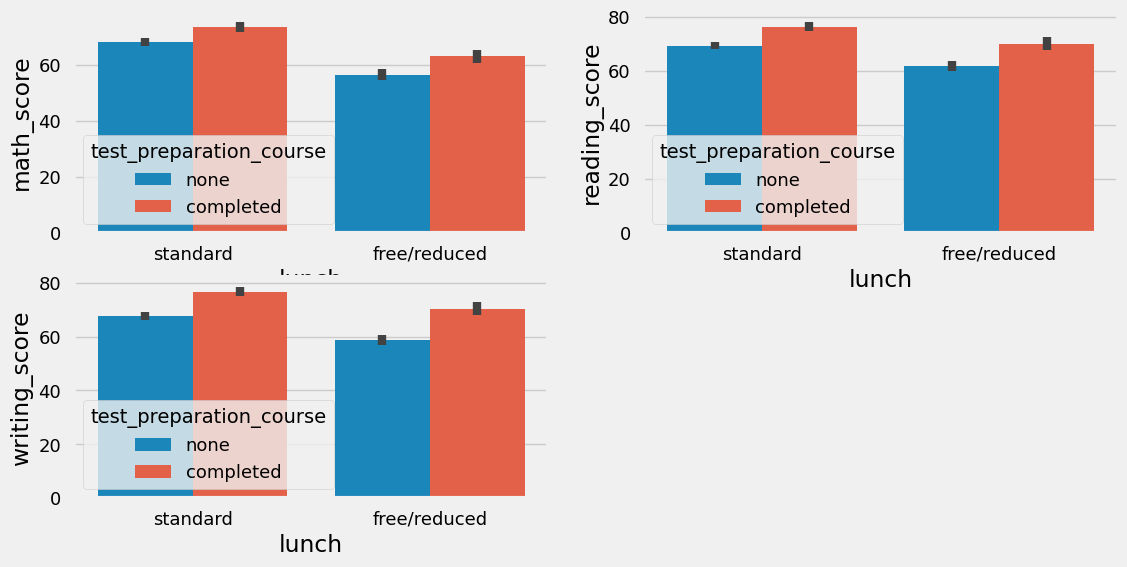

In [155]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], 
             y=df['math_score'], 
             hue=df['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], 
             y=df['reading_score'], 
             hue=df['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], 
             y=df['writing_score'], 
             hue=df['test_preparation_course'])

## Checking outliers

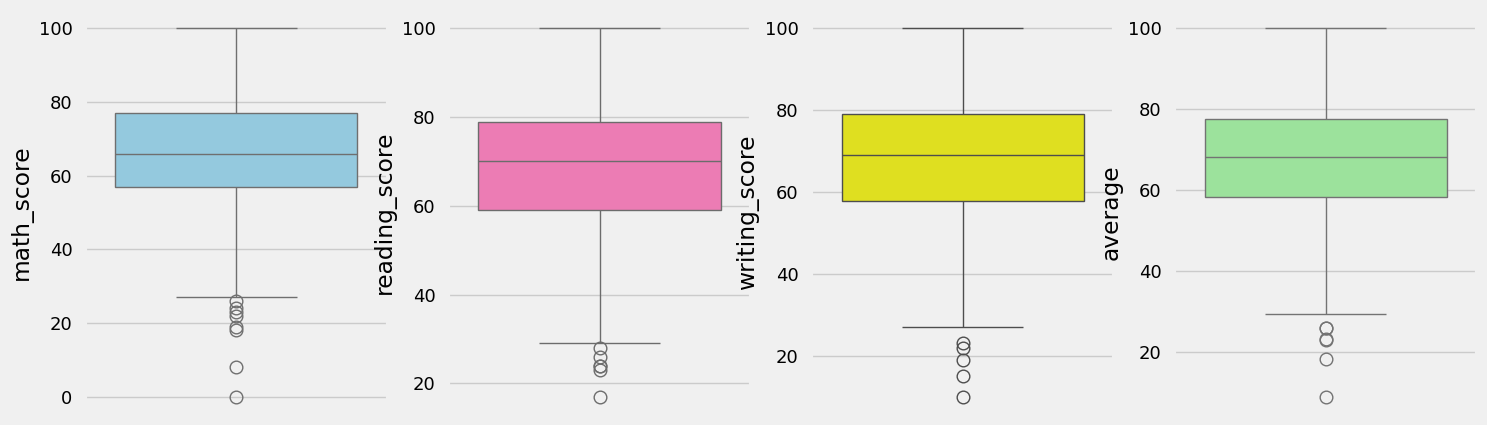

In [156]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## multivariant analysis

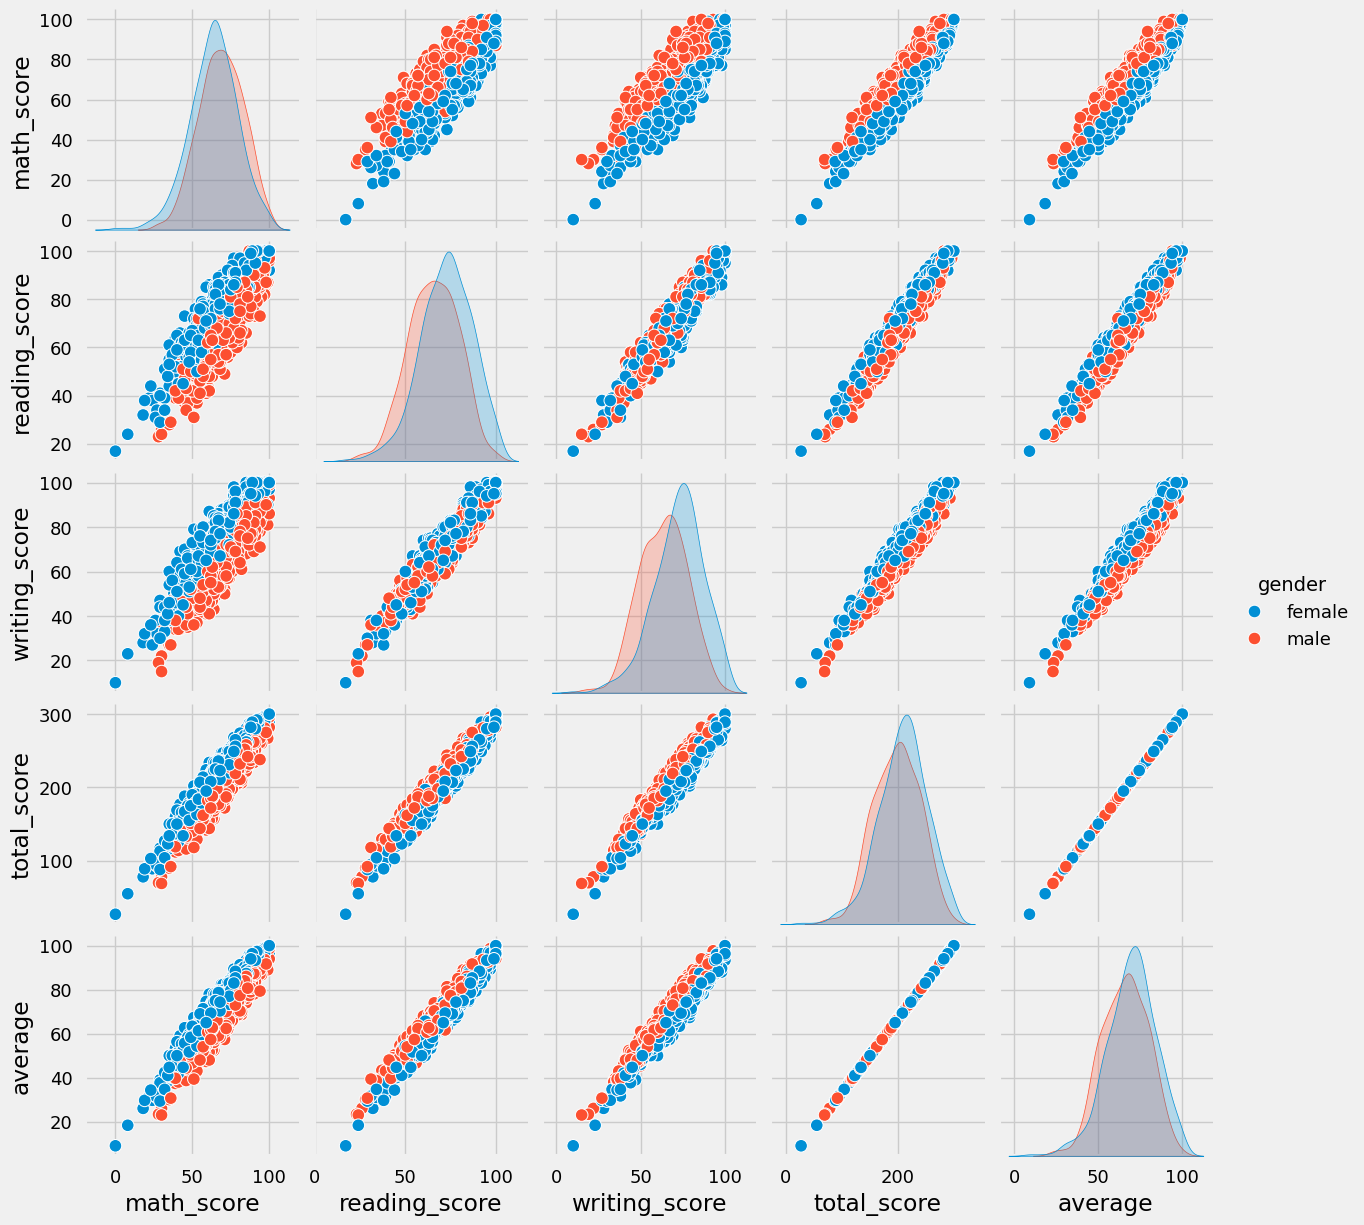

In [157]:
sns.pairplot(df,hue = 'gender')
plt.show()